<a href="https://colab.research.google.com/github/himaneetripathi/SalesPrediction/blob/main/Copy_of_himanee_02_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Core Project

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
from google.colab import drive
drive.mount("/content/drive")
drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


In [248]:
df1 = pd.read_csv('/content/drive/MyDrive/Data/sales_predictions.csv')
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [249]:
df1.shape     #Gives count of rows and columns of data

(8523, 12)

In [250]:
df1.dtypes          #to get info about type of data

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [251]:
df1.info()        #to get info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [252]:
dups = df1.duplicated()       #to identify duplicates
dups

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [253]:
df = df1.drop_duplicates()      #to drop duplicates
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [254]:
df.isna().sum()      #finding missing value and count

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [255]:
df['Outlet_Size'].fillna('Medium' , inplace = True)     #replacing missing value
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [256]:
df['Item_Weight'].mean()

12.857645184136183

In [257]:
df['Item_Weight'].fillna( df['Item_Weight'].mean() , inplace = True)     #Replacing missing value with mean
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [258]:
df.isna().sum()       # To Confirm that there are no missing values after addressing them.

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [259]:
# To fix any inconsistent categories of data (example: fix cat, Cat, and cats
df['Item_Fat_Content'].replace({'LF' : 'Low Fat'}, inplace=True)     
df['Item_Fat_Content'].replace({'Low fat' : 'Low Fat'}, inplace=True )
df['Item_Fat_Content'].replace({'low fat' : 'Low Fat'}, inplace=True)
df['Item_Fat_Content'].replace({'reg' : 'Regular'}, inplace=True)


In [260]:
df['Item_Fat_Content'].unique()    #To verify that the inconsistencies are fixed

array(['Low Fat', 'Regular'], dtype=object)

In [261]:
df.groupby('Item_Type')['Item_MRP'].mean()   #for grouping Item types with their MRP

Item_Type
Baking Goods             126.380766
Breads                   140.952669
Breakfast                141.788151
Canned                   139.763832
Dairy                    148.499208
Frozen Foods             138.503366
Fruits and Vegetables    144.581235
Hard Drinks              137.077928
Health and Hygiene       130.818921
Household                149.424753
Meat                     139.882032
Others                   132.851430
Seafood                  141.841719
Snack Foods              146.194934
Soft Drinks              131.492506
Starchy Foods            147.838023
Name: Item_MRP, dtype: float64

In [262]:
df.describe()     #For any numerical columns, obtain the summary statistics of each (min, max, mean)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Histogram to view the distributions of various features in the datase

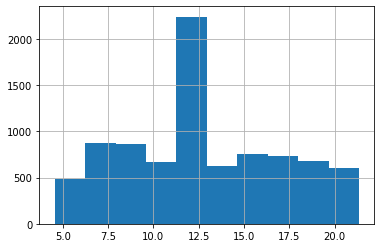

In [263]:
df['Item_Weight'].hist()

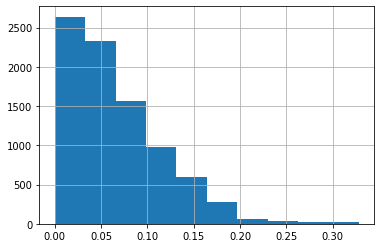

In [264]:
df['Item_Visibility'].hist()

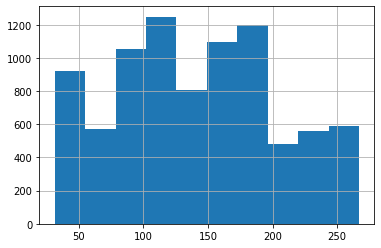

In [265]:
df['Item_MRP'].hist()

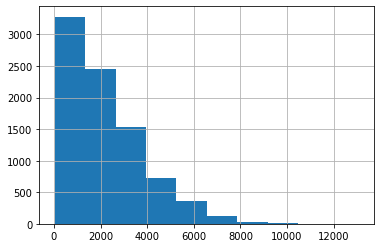

In [266]:
df['Item_Outlet_Sales'].hist()

To show Correlation between columns

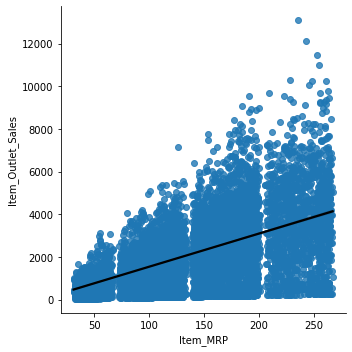

In [267]:
sns.lmplot(data=df , x='Item_MRP' , y='Item_Outlet_Sales' , line_kws ={'color' : 'black'})

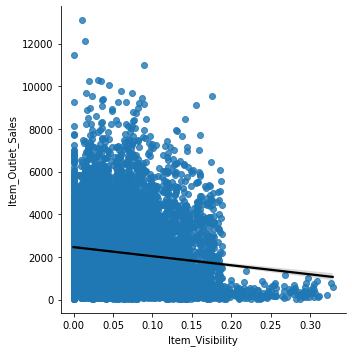

In [268]:
sns.lmplot(data=df , x='Item_Visibility' , y='Item_Outlet_Sales' ,line_kws ={'color' : 'black'} )

Boxplot to view statistical summaries of various features in your dataset

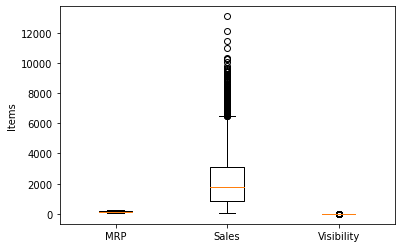

In [269]:
plt.ylabel('Items')
MRP = df['Item_MRP']
Sales = df['Item_Outlet_Sales']
Visibility = df['Item_Visibility']
plt.boxplot([MRP , Sales , Visibility], labels=['MRP','Sales' , 'Visibility']);


To create a heatmap to show any potential correlation in data 

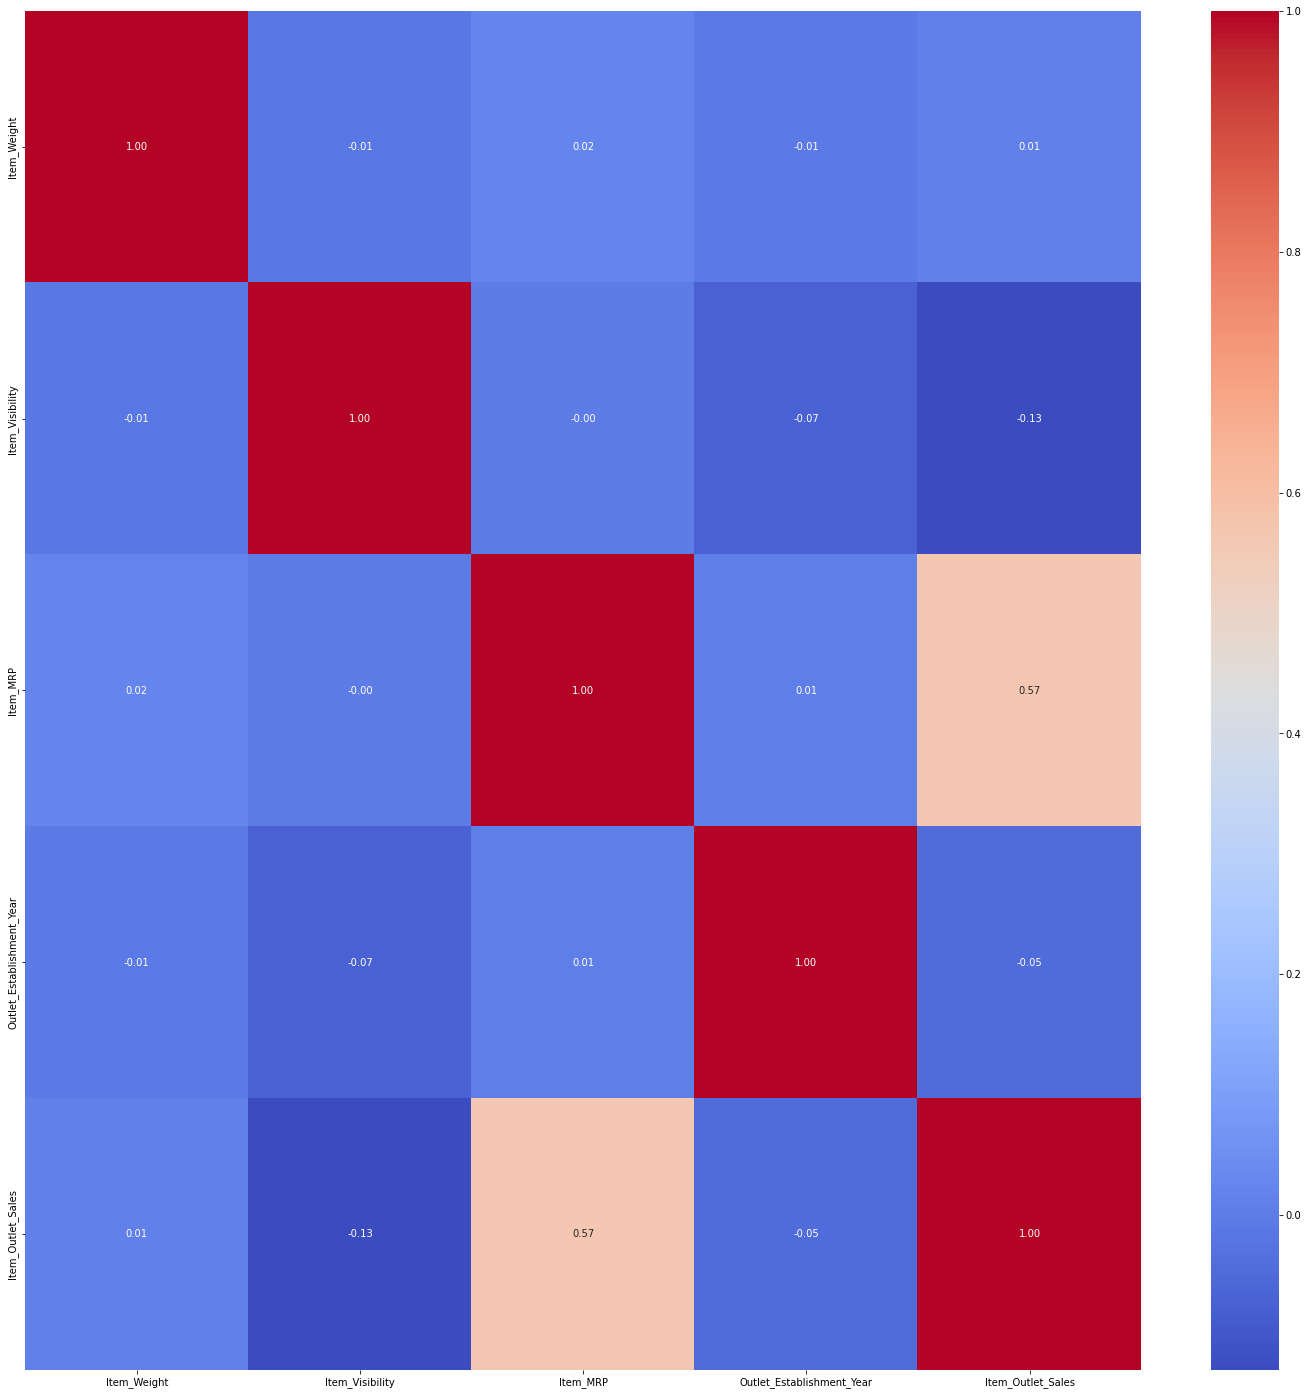

In [270]:
corr = df.drop(columns = 'Item_Type').corr()
plt.figure(figsize = (25,25))
sns.heatmap(corr, cmap = 'coolwarm' , annot=True , fmt='0.2f')

Explanatory data analysis

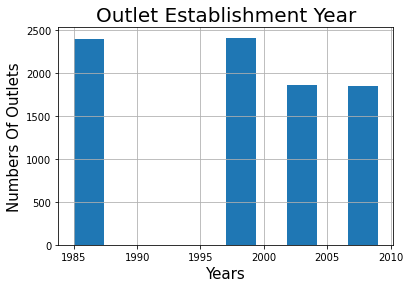

In [271]:
#df['Outlet_Establishment_Year']
plt.title('Outlet Establishment Year', fontsize = 20)
plt.ylabel('Numbers Of Outlets', fontsize = 15)
plt.xlabel('Years', fontsize = 15)
df['Outlet_Establishment_Year'].hist()

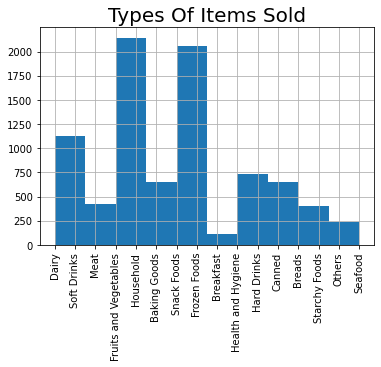

In [272]:
plt.title('Types Of Items Sold', fontsize = 20)
df['Item_Type'].hist()
plt.xticks(rotation=90);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


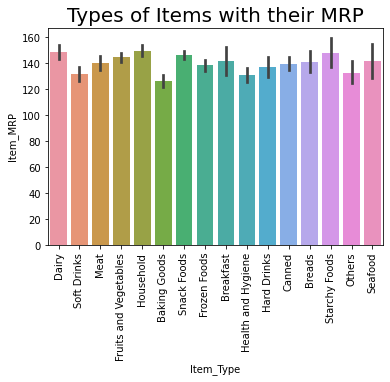

In [273]:
plt.title('Types of Items with their MRP', fontsize = 20)
sns.barplot(df['Item_Type'], x='Items', y=df['Item_MRP'])
plt.xticks(rotation=90);

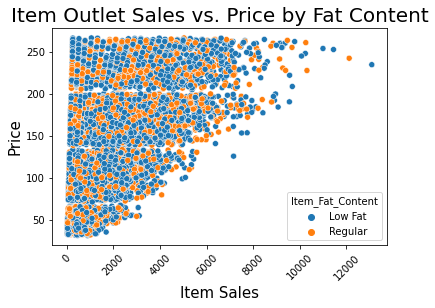

In [274]:
sns.scatterplot(data=df ,x='Item_Outlet_Sales' , y=df['Item_MRP'] , hue='Item_Fat_Content')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Item Outlet Sales vs. Price by Fat Content', fontsize=20)
plt.xlabel('Item Sales', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(rotation = 45);



## For Machine Learning

In [275]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [276]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [277]:
df1.shape

(8523, 12)

In [278]:
df1['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Identifying the features (X) and target (y).

 Assigning the "Item_Outlet_Sales" column as our target and the rest of the relevant variables as our features matrix

 Since there are no missing values in our target column, we can split the data.

In [279]:
# import required packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, \
OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

In [280]:
# Ordinal Encoding 'Complication_risk'
replacement_dictionary = {'Low Fat':0, 'Regular':1, 'LF':0, 'low fat':0, 'reg':1}
df1['Item_Fat_Content'].replace(replacement_dictionary, inplace=True)
df1['Item_Fat_Content']

0       0
1       1
2       0
3       1
4       0
       ..
8518    0
8519    1
8520    0
8521    1
8522    0
Name: Item_Fat_Content, Length: 8523, dtype: int64

In [281]:
## Define X,y
target = 'Item_Outlet_Sales'
X = df1.drop(columns= ['Item_Outlet_Sales', 'Outlet_Establishment_Year', 'Item_Identifier'])
y = df1[target]

Performing a train test split. 

In [282]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.shape

(6392, 9)

In [283]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,0,0.029565,Household,256.4646,OUT018,Medium,Tier 3,Supermarket Type2
7510,15.250,1,0.000000,Snack Foods,179.7660,OUT018,Medium,Tier 3,Supermarket Type2
5828,12.350,1,0.158716,Meat,157.2946,OUT049,Medium,Tier 1,Supermarket Type1
5327,7.975,0,0.014628,Baking Goods,82.3250,OUT035,Small,Tier 2,Supermarket Type1
4810,19.350,0,0.016645,Frozen Foods,120.9098,OUT045,NaN,Tier 2,Supermarket Type1


In [284]:
X_test.shape

(2131, 9)

In [285]:
y_train.shape

(6392,)

In [286]:
y_test.shape

(2131,)

Creating a preprocessing object to prepare the dataset for Machine Learning

Featuring df by dtypes

Numeric - Item_Weight, Item_MRP  
          
Ordinal - Item_Fat_Content, Item_Type, Outlet_Size, Outlet_Location_Type, Outlet_Type

 Nominal - Outlet_Identifier

In [287]:
# select only object columns
categoricals = X_train.select_dtypes(include='object')

# check value counts for each object column
for col in categoricals.columns:
  print(col)
  print(categoricals[col].value_counts(), '\n')

Item_Type
Fruits and Vegetables    948
Snack Foods              906
Household                695
Frozen Foods             632
Dairy                    507
Canned                   481
Baking Goods             478
Health and Hygiene       390
Soft Drinks              331
Meat                     302
Breads                   175
Hard Drinks              169
Others                   130
Starchy Foods            122
Breakfast                 84
Seafood                   42
Name: Item_Type, dtype: int64 

Outlet_Identifier
OUT027    723
OUT035    709
OUT018    704
OUT045    699
OUT017    698
OUT046    695
OUT013    689
OUT049    676
OUT010    415
OUT019    384
Name: Outlet_Identifier, dtype: int64 

Outlet_Size
Medium    2103
Small     1788
High       689
Name: Outlet_Size, dtype: int64 

Outlet_Location_Type
Tier 3    2531
Tier 2    2106
Tier 1    1755
Name: Outlet_Location_Type, dtype: int64 

Outlet_Type
Supermarket Type1    4166
Grocery Store         799
Supermarket Type3     723
Superm

In [288]:
#instantiate the StandardScaler, OneHotEncoder, OrdinalEncoder and Imputers
scaler1 = MinMaxScaler()
ohe = OneHotEncoder(sparse=False, categories='auto',  handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')

Using pipelines and column transformers to complete the following tasks: Imputing any missing values. Using the ‘mean’ strategy for numeric columns and the ‘most_frequent’ strategy for categorical columns. One-hot encoding the nominal features. Scaling the numeric columns.

In [289]:
# To create a list of ordinal labels, in order of least to most

Outlet_Identifier = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049']
Outlet_Size = ['Small', 'Medium', 'High']
Outlet_Location_Type = ['Tier 1', 'Tier 2', 'Tier 3']
Outlet_Type = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']

#To combine the ordered list in the order that the columns appear
ordered_labels = [Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type ]


Item_Type = ['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks', 'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast', 'Seafood']
nominal_labels = [Item_Type]

#To handle_unknown is 'error' by default.  That's a good place to startbut it may cause problems in a production model.  
ordinal = OrdinalEncoder(categories = ordered_labels)

In [290]:
ordinal_cols = ['Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
numeric_cols = ['Item_Weight','Item_Fat_Content', 'Item_Visibility', 'ItemMRP']
nominal_cols = [ 'Item_Type']

num_selector = make_column_selector(dtype_include='number')
# Setup the pipelines for the numeric and categorical data

num_pipeline = make_pipeline(mean_imputer, scaler1)
ord_pipeline = make_pipeline(freq_imputer, ordinal)
nom_pipeline = make_pipeline(missing_imputer, ohe)

# Setup the tuples to pair the processors with the make column selectors

numeric_tuple = (num_pipeline, num_selector)
ordinal_tuple = (ord_pipeline, ordinal_cols)
nominal_tuple = (nom_pipeline, nominal_cols)

In [291]:
# Instantiate the make column transformer

preprocessor = make_column_transformer(ordinal_tuple, 
                                          numeric_tuple, 
                                          nominal_tuple, 
                                          remainder='drop')

Transformer Data

In [292]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['OUT010',
                                                                              'OUT013',
                                                                              'OUT017',
                                                                              'OUT018',
                                                                              'OUT019',
                                                                              'OUT027',
                                                                              'OUT035',
                                                                              'OUT045',
                                                                              'OUT046',
                                                                              'OUT049'],
                                                                             ['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3'],
                                                                             ['Grocery '
                                                                              'Store',
                                                                              'Supermarket '
                                                                              'Typ...
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fcb404dd510>),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Type'])])

In [293]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Check the result

In [294]:
# Check that the data is scaled and one-hot encoded
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed



All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 24)




array([[3., 1., 2., ..., 0., 0., 0.],
       [3., 1., 2., ..., 1., 0., 0.],
       [9., 1., 0., ..., 0., 0., 0.],
       ...,
       [7., 1., 1., ..., 0., 0., 0.],
       [2., 1., 1., ..., 1., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.]])

In [295]:
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,3.0,1.0,2.0,2.0,0.702292,0.0,0.090031,0.955756,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1.0,2.0,2.0,0.636797,1.0,0.000000,0.630208,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,9.0,1.0,0.0,1.0,0.464126,1.0,0.483313,0.534828,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,6.0,0.0,1.0,1.0,0.203632,0.0,0.044546,0.216619,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,1.0,1.0,1.0,0.880917,0.0,0.050687,0.380392,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [296]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6392 non-null   float64
 1   1       6392 non-null   float64
 2   2       6392 non-null   float64
 3   3       6392 non-null   float64
 4   4       6392 non-null   float64
 5   5       6392 non-null   float64
 6   6       6392 non-null   float64
 7   7       6392 non-null   float64
 8   8       6392 non-null   float64
 9   9       6392 non-null   float64
 10  10      6392 non-null   float64
 11  11      6392 non-null   float64
 12  12      6392 non-null   float64
 13  13      6392 non-null   float64
 14  14      6392 non-null   float64
 15  15      6392 non-null   float64
 16  16      6392 non-null   float64
 17  17      6392 non-null   float64
 18  18      6392 non-null   float64
 19  19      6392 non-null   float64
 20  20      6392 non-null   float64
 21  21      6392 non-null   float64
 22  

Our first task is to build a linear regression model to predict sales.

Building a linear regression model.


In [297]:
# Imports required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import set_config
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, \
OrdinalEncoder



Our first task is to build a linear regression model to predict sales.

Build a linear regression model.

In [298]:
reg = LinearRegression()      

In [299]:
reg_pipe = make_pipeline(preprocessor, reg)      # Creating a modeling pipeline

In [300]:
reg_pipe.fit(X_train, y_train)      # Model is learning the relationship between X and y

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['OUT010',
                                                                                               'OUT013',
                                                                                               'OUT017',
                                                                                               'OUT018',
                                                                                               'OUT019',
                                                                                               'OUT027',
                                                                                               'OUT035',
                                                                                               'OUT045',
                                                                                               'OUT046',
                                                                                               'OUT049'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'...
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcb404dd510>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Type'])])),
                ('linearregression', LinearRegression())])

In [301]:
test_ped = reg_pipe.predict(X_test)
train_ped = reg_pipe.predict(X_train)

In [302]:
train_MSE = mean_squared_error(y_train , train_ped)
test_MSE = mean_squared_error(y_test , test_ped)

print(f'Model Training MES :{train_MSE}')
print(f'Model Testing MES :{test_MSE}')

Model Training MES :1449644.5081538328
Model Testing MES :1355456.1821280303


Evaluating the performance of our model based on r^2.

In [303]:
train_R2 = 1 - (train_MSE/np.var(y_train))
test_R2 = 1 - (test_MSE/np.var(y_test))
                           
print(f'Model Training R2 :{train_R2}')
print(f'Model Testing R2 :{test_R2}')

Model Training R2 :0.5101651611353508
Model Testing R2 :0.5087106413965456


Evaluating the performance of our model based on rmse.

In [304]:
train_RMSE = np.sqrt(np.mean((y_train - train_ped)**2))
test_RMSE = np.sqrt(np.mean((y_test - test_ped)**2))

print(f'Model Training RMSE :{train_RMSE}')
print(f'Model Testing RMSE :{test_RMSE}')

Model Training RMSE :1204.0118388761098
Model Testing RMSE :1164.2406031950748


Our second task is to build a regression tree model to predict sales.

Building a simple regression tree model.

In [305]:
#By leaving the parenthesis empty, we are choosing to use all of the default parameters
dec_tree = DecisionTreeRegressor(random_state = 42)

In [306]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [307]:
train_preds = dec_tree.predict(X_train_processed)     # predicts target values of training and testing set
test_preds = dec_tree.predict(X_test_processed)

Evaluating the performance of the model based on r^2.

In [308]:
#The default metric for regression models is the R^2 Score. 
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.16708220068581514


In [309]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [310]:
dec_tree.get_depth()     # determine the depth of decision tree

44

In [311]:
dec_tree.get_n_leaves()

6265

We see that our tree has a depth of 44 

We can also see that our tree has 6265 leaf nodes.

In [312]:
# Let's go extreme and set our max depth to 1
dec_tree_1 = DecisionTreeRegressor(max_depth = 1, random_state = 42)
dec_tree_1.fit(X_train_processed, y_train)
train_1_score = dec_tree_1.score(X_train_processed, y_train)
test_1_score = dec_tree_1.score(X_test_processed, y_test)
print(train_1_score)
print(test_1_score)

0.23779715896629305
0.2296825886952033


As we can see our scores on both the training and test sets are much lower.  This indicates that with a max depth of 1, our model is underfitting.

In [313]:
# Creating a function to take the true and predicted labels and print MAE, MSE, RMSE, and R2 metrics
def evaluate_regression(y_true, y_pred):
  """Takes true target and predicted target and prints MAE, MSE, RMSE and R2"""
  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'scores: \nMAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}')

Evaluating the performance of the model based on r^2.

In [314]:
# creating a range of max_depth values to loop over
depths = range(1, 44)
# creating a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train','Test'], index=depths)
# looping over the values in the depths range 
for depth in depths:
  # fitting a new model with the depth
  dec = DecisionTreeRegressor(max_depth=depth)
  # put model in a pipeline
  dec_pipe = make_pipeline(preprocessor, dec)
  # fitting the model
  dec_pipe.fit(X_train, y_train)
  # creating prediction arrays
  train_pred = dec_pipe.predict(X_train)
  test_pred = dec_pipe.predict(X_test)

  # evaluating the model using R2 score
  train_r2 = r2_score(y_train, train_pred)
  test_r2 = r2_score(y_test, test_pred)
  # storing the scores in a dataframe
  scores.loc[depth, 'Train'] = train_r2
  scores.loc[depth, 'Test'] = test_r2


In [315]:
# printing scores
scores


,Train,Test
1,0.237797,0.229683
2,0.431641,0.433778
3,0.524218,0.524222
4,0.582625,0.584005
5,0.60394,0.59471
6,0.615072,0.582356
7,0.62646,0.578732
8,0.642733,0.564996
9,0.663728,0.554374
10,0.684138,0.529445


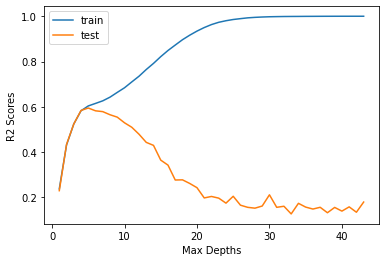

In [316]:
#ploting the scores to visually determine the best max_depth
import matplotlib.pyplot as plt

plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

In [317]:
# sorting the dataframe by test scores and save the index (k) of the best score
scores.sort_values(by='Test', ascending=False)

,Train,Test
5,0.60394,0.59471
4,0.582625,0.584005
6,0.615072,0.582356
7,0.62646,0.578732
8,0.642733,0.564996
9,0.663728,0.554374
10,0.684138,0.529445
3,0.524218,0.524222
11,0.709877,0.509761
12,0.735096,0.478999


In [318]:
# printing the best score
best_depth = scores.sort_values(by='Test', ascending=False).index[0]

In [319]:
# Creating and evaluating a new model with the best depth from the loop above
best_dec = DecisionTreeRegressor(max_depth=best_depth)

best_dec.fit(X_train_processed, y_train)

print('Train')
evaluate_regression(y_train, best_dec.predict(X_train_processed))
print('\nTest')
evaluate_regression(y_test, best_dec.predict(X_test_processed))

Train
scores: 
MAE: 762.61 
MSE: 1,172,122.77 
RMSE: 1,082.65 
R2: 0.60

Test
scores: 
MAE: 738.32 
MSE: 1,118,185.97 
RMSE: 1,057.44 
R2: 0.59


We have tried 2 different models on our data set,in order to determine which model to implement we need to compare the values,

linear Regression Model

Training R2 : 0.5101
Testing R2 : 0.5087

TrainingRMSE : 1204.0118
TestingRMSE : 1164.2406


Regression Tree Model

TrainingR2 : 0.60
TestingR2 : 0.59

TrainingRMSE : 1082.65
TestingRMSE : 1057.44

we can notice that in the Regression Tree Model the training and test results, especially RMSE are more closer to each other (a sign of reduced overfitting) so we can say that these values are more suitable for our model. 




